### 파이차트

- 파이 차트는 원을 파이 조각처럼 나누어서 표현한다. 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례한다.
- plot() 메소드에 kind='pie' 옵션을 사용한다.

예제는 데이터 개수를 세기 위해 숫자 1을 원소로 갖는 'count'열을 만들고 groupby() 메소드를 사용하여 데이터프레임 df의 모든 데이터를 'origin' 열 값인 '1'(=USA),'2'(=EU),'3'(=JPN)을 기준으로 3개의 그룹으로 나눈다. sum() 메소드로 각 그룹별 합계를 집계하여 df_origin 변수에 저장한다.

           mpg  cylinders  displacement  weight  acceleration  model year  \
origin                                                                      
1       5000.8       1556       61229.5  837121        3743.4       18827   
2       1952.4        291        7640.0  169631        1175.1        5307   
3       2405.6        324        8114.0  175477        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


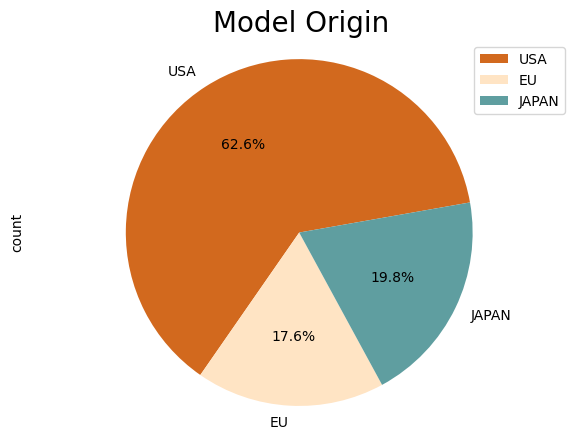

In [3]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv')

plt.style.use('default')   # 스타일 서식 지정

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin)                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

### 박스 플롯

- 박스 플롯은 범주형 데이터의 분포를 파악하는데 적합하다.
- 박스 플롯은 5개의 통계지표(최소값, 1분위값, 중간값, 3분위값, 최대값)를 제공한다.

다음의 예제에서 제조국가별 연비 분포를 보여주는 박스 플롯을 그린다. figure() 함수로 생성하는 그림틀의 크기는 figsize=(15,5) 옵션을 사용하여 가로 15, 세로 5로 설정한다.    
그림틀을 2개의 axe 객체로 분할하기 위해 add_subplot() 메소드를 적용.   
각각 ax1,ax2 변수로 저장한다. 각 객체에 박스 플롯을 그리는 boxplot() 메소드를 적용, 'origin'값이 1인 'mpg'열, 'origin'값이 2인 'mpg'열, 'origin'값이 3인 'mpg'열의 데이터 분포를 출력한다.   
박스 플롯에 넣을 열 3개를 리스트로 담아서 x옵션에 할당한다. labels 옵션을 이용하여 각 열을 나타내는 라벨을 정의한다. 화면 오른쪽 ax2 객체에 vert=False 옵션을 사용하여 수평 박스 플롯을 그린다.

In [4]:
import warnings
warnings.filterwarnings('ignore') # 각종 warning 무시하기

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 전역 폰트 적용하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

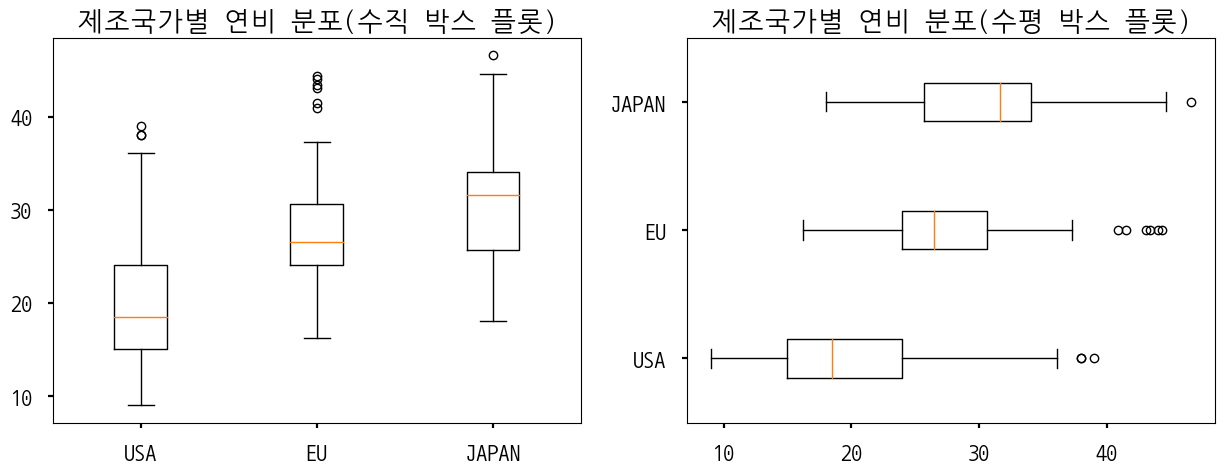

In [5]:
plt.style.use('seaborn-poster') #스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

df = pd.read_csv('./auto-mpg.csv')

# 그래프 객체 생성 figure에 2개 서브 플롯생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# axe 객체에 boxplot 매소드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'],
           vert=False)
ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()